# Daten importieren
*Datenquelle: [https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset](https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset)*

In [18]:
import pandas as pd

df = pd.read_csv("car_data.csv")
df

,Age,AnnualSalary,Purchased
0,54,136500,False
1,41,67500,False
2,50,29500,True
3,20,86000,False
4,27,31500,False
...,...,...,...
145,63,36500,True
146,38,61000,False
147,23,28000,False
148,49,43500,True


In [19]:
df.describe()

,Age,AnnualSalary
count,150.000000,150.000000
mean,39.340000,70180.000000
std,10.969653,32169.552907
min,18.000000,15000.000000
25%,31.000000,44500.000000
50%,39.000000,71000.000000
75%,47.000000,86375.000000
max,63.000000,150500.000000


# Verteilungen visualisieren

<Axes: xlabel='Age', ylabel='Count'>

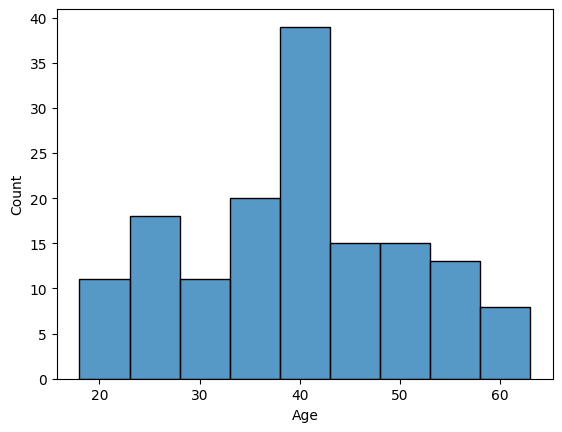

In [20]:
import seaborn as sns

sns.histplot(df["Age"])

<Axes: xlabel='AnnualSalary', ylabel='Count'>

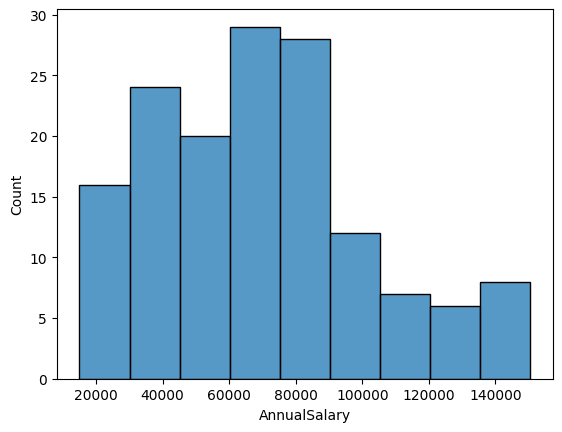

In [21]:
sns.histplot(df["AnnualSalary"])

# Daten aufteilen

In [22]:
X = df.copy()
y = X.pop("Purchased")

In [23]:
X

,Age,AnnualSalary
0,54,136500
1,41,67500
2,50,29500
3,20,86000
4,27,31500
...,...,...
145,63,36500
146,38,61000
147,23,28000
148,49,43500


In [24]:
y

0      False
1      False
2       True
3      False
4      False
       ...  
145     True
146    False
147    False
148     True
149     True
Name: Purchased, Length: 150, dtype: bool

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Trainingsdaten visualisieren

<Axes: xlabel='Age', ylabel='AnnualSalary'>

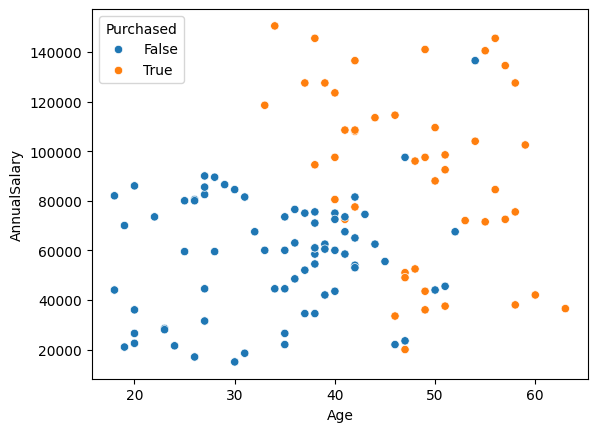

In [26]:
sns.scatterplot(x=X_train["Age"], y=X_train["AnnualSalary"], hue=y_train)

# Gaussian Naive Bayes - Modell trainieren

In [27]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# GaussianNB - Entscheidungsgrenze visualisieren

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(model, feature_1, feature_2, target):
    # Grenzen des Plots basierend auf den Merkmalen definieren
    x_min, x_max = feature_1.min() - 0.2, feature_1.max() + 0.2
    y_min, y_max = feature_2.min() - 0.2, feature_2.max() + 0.2

    # Ein Gitter von Punkten mit einem Abstand von 0.03 zwischen ihnen erstellen
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.3), np.arange(y_min, y_max, 3))

    # Vorhersagen für jeden Punkt im Gitter generieren und die Form der Ausgabe anpassen
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Hintergrund des Plots mit den Vorhersagen färben
    plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(["lightblue", "lightcoral"]))

    # Scatterplot der tatsächlichen Datenpunkte
    sns.scatterplot(x=feature_1, y=feature_2, hue=target)

    # Beschriftung der Achsen und Titel
    plt.xlabel(feature_1.name)
    plt.ylabel(feature_2.name)
    plt.title("Entscheidungsgrenze")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


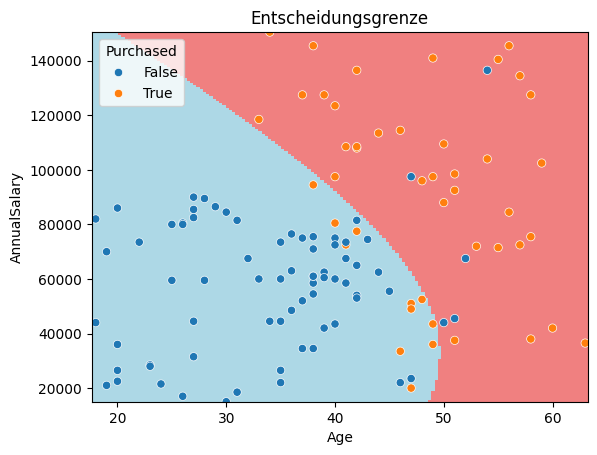

In [29]:
plot_decision_boundaries(model, X_train["Age"], X_train["AnnualSalary"], y_train)

# Finale Accuracy

In [30]:
from sklearn.metrics import accuracy_score

y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print("Final Accuracy:", accuracy)

Final Accuracy: 0.9


# Confusion Matrix

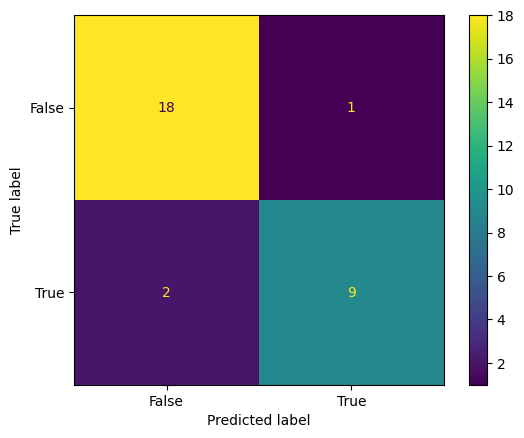

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


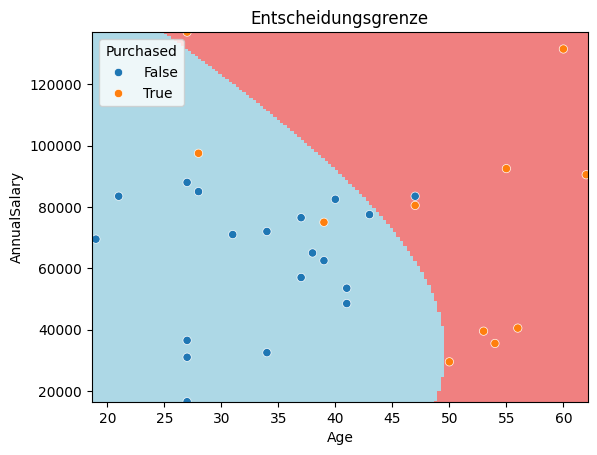

In [32]:
plot_decision_boundaries(model, X_test["Age"], X_test["AnnualSalary"], y_test)